In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from numpy.random import seed
seed(1)
import tensorflow

In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
df_meta = pd.read_csv('pitch_meta.csv')
df_meta.head()

,plyrid,perf_key,songid,gender,birthyear,lovetot,zone
0,360,360_35435057,_hey_there_delilah,M,1988,3,EN
1,360,360_26934219,_closing_time,M,1988,2,EN
2,360,360_35435961,_burn,M,1988,2,EN
3,360,360_36313263,_burn,M,1988,2,EN
4,360,360_35352936,_as_long_as_you_love_me,M,1988,2,EN


In [6]:
df1 = df_meta['songid'].value_counts().reset_index()
song_arr = list(df1['index'])
song_arr[-10:]
songs_test=song_arr[-10:]

In [7]:

df_test = df_meta.loc[df_meta['songid'].isin(songs_test)]
len(df_test)

252

In [8]:
perf_test = list(df_test['perf_key'])
perf_test

['72214345_43096324',
 '76868786_34829517',
 '78839133_40374311',
 '80093518_22721014',
 '80504974_22682537',
 '81344895_22865249',
 '81948812_27348038',
 '82339301_34572864',
 '82754206_26480181',
 '84424287_36443753',
 '85038915_28695122',
 '85038915_36231950',
 '85904363_28579170',
 '87696931_32861928',
 '88269492_46300434',
 '88551416_44159631',
 '88751158_45400672',
 '89052365_41975477',
 '89278472_22872165',
 '90500845_43603595',
 '92645729_46848908',
 '95516523_38150777',
 '96598340_38987987',
 '98595226_27313992',
 '98595226_37322824',
 '98606483_27870275',
 '100630270_46817649',
 '101382480_34467406',
 '101647500_42399406',
 '102087231_30606571',
 '102312623_27988086',
 '102853234_29957512',
 '102853234_27234195',
 '102860994_30280762',
 '103429325_27008968',
 '103696343_44172896',
 '104282674_30110076',
 '105383004_31000503',
 '105530685_50538037',
 '106117853_34497350',
 '108290378_33674583',
 '108290378_32011603',
 '109305645_34516914',
 '110033515_28392947',
 '110348885_40

In [37]:
path = 'audio/130141547_24617160.m4a'
y, sr = librosa.load(path)
y= y[sr*30:sr*90]

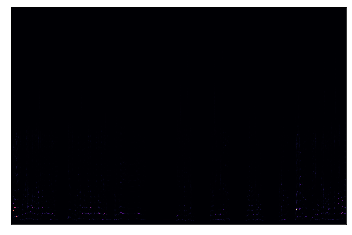

In [38]:
import librosa.display
sg0 = librosa.stft(y)
sg_mag, sg_phase = librosa.magphase(sg0)
display(librosa.display.specshow(sg_mag))

In [39]:
len(y)/sr

60.0

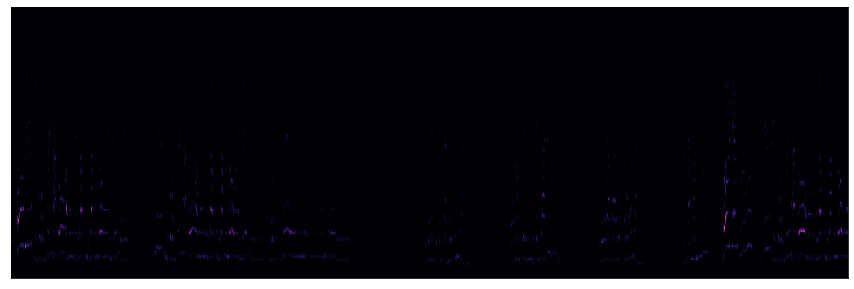

In [40]:
plt.figure(figsize=(15, 5))
sg1 = librosa.feature.melspectrogram(S=sg_mag, sr=sr)
display(librosa.display.specshow(sg1))

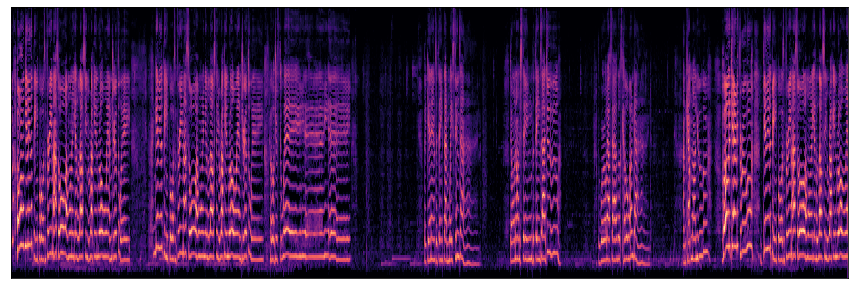

In [50]:
plt.figure(figsize=(15, 5))
sg2 = librosa.amplitude_to_db(sg1, ref=np.min)
librosa.display.specshow(sg2)
plt.savefig('test_image.png')

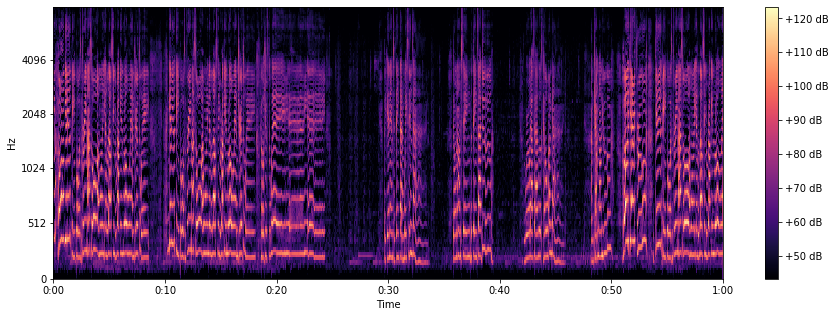

In [46]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(sg2, sr=22050, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')

In [45]:
print(type(sg2))
sg2.shape

<class 'numpy.ndarray'>


(128, 2584)

TypeError: Image data of dtype <U14 cannot be converted to float

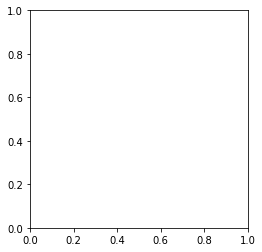

In [52]:
import matplotlib.image as mpimg
plt.figure()
plt.imshow('test_image.png')
plt.colorbar()
plt.grid(False)
plt.show()

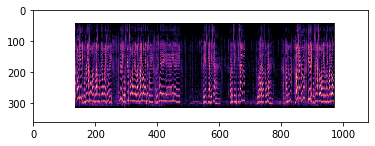

In [54]:
img = mpimg.imread('test_image.png')
imgplot = plt.imshow(img)

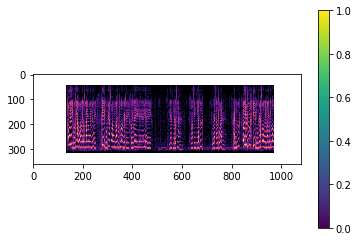

In [56]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [68]:
song_test_dict = {}
df_test = df_test[['perf_key','songid']]
df_test.iloc[0]['songid']

'_you_make_me_feel_brand'

In [85]:
arrt = []
df2 = df_test.loc[df_test['perf_key']=='145603441_26240861']
df2 = df2.reset_index()
df2['songid'][0]

'_in_my_head'

In [9]:
sg_array = []
sg_labels = []
for perf in perf_test:
    try:
        path = 'audio/'+perf+'.m4a'
        y, sr = librosa.load(path)
        y= y[sr*30:sr*90]
        sg0 = librosa.stft(y)
        sg_mag, sg_phase = librosa.magphase(sg0)
        sg1 = librosa.feature.melspectrogram(S=sg_mag, sr=sr)
        sg2 = librosa.amplitude_to_db(sg1, ref=np.min)
        print(sg2.shape)
        df2 = df_test.loc[df_test['perf_key']==perf]
        df2 = df2.reset_index()
        class_song = df2['songid'][0]
        if(sg2.shape==(128, 2584)):
            sg_array.append(sg2)
            sg_labels.append(class_song)     
        print(sg_labels)
    except:
        print('error'+perf)

(128, 2584)
['_you_make_me_feel_brand']
(128, 2584)
['_you_make_me_feel_brand', '_say_somethin']
(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy']
(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin']
(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin']
(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin']
(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand']
(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings']
(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_d

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings']
(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand']
(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_g

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

C:\Users\marii\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

(128, 2584)
['_you_make_me_feel_brand', '_say_somethin', '_you_drive_me_crazy', '_summertime_gershwin', '_summertime_gershwin', '_summertime_gershwin', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_say_somethin', '_say_somethin', '_you_make_me_feel_brand', '_summertime_gershwin', '_drift_away', '_you_drive_me_crazy', '_you_drive_me_crazy', '_drift_away', '_summertime_gershwin', '_shes_always_a_woman', '_shes_always_a_woman', '_making_memories_of_us', '_broken_wings', '_you_make_me_feel_brand', '_luka', '_you_make_me_feel_brand', '_broken_wings', '_broken_wings', '_you_drive_me_crazy', '_making_memories_of_us', '_drift_away', '_you_make_me_feel_brand', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_making_memories_of_us', '_summertime_gershwin', '_drift_away', '_making_memories_of_us', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_you_make_me_feel_brand', '_broken_wings', '_shes_always_a_woman', '_you_make_me_feel_bran

In [10]:
X = np.array(sg_array)
y = np.array(sg_labels)
print(X.shape, y.shape)

(250, 128, 2584) (250,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)

In [12]:
from sklearn.preprocessing import StandardScaler

scalers = {}
for i in range(X_train.shape[1]):
    scalers[i] = StandardScaler()
    X_train[:, i, :] = scalers[i].fit_transform(X_train[:, i, :]) 

for i in range(X_test.shape[1]):
    X_test[:, i, :] = scalers[i].transform(X_test[:, i, :]) 

In [13]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [14]:
df_test['songid'].nunique()

10

In [15]:
y_train_categorical = to_categorical(encoded_y_train, num_classes = 10)
y_test_categorical = to_categorical(encoded_y_test,num_classes = 10)

In [16]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add.Flatten(input_shape=(128, 2584))
model.add(Dense(units=127, activation='relu'))
#model.add(Dense(units=150, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

AttributeError: 'function' object has no attribute 'Flatten'

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
model = Sequential()
model.add(Dense(16, input_shape=(128, 2584),activation='relu'))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128, 16)           41360     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20490     
Total params: 61,850
Trainable params: 61,850
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(
    X_train,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=1
)

Train on 187 samples
Epoch 1/100
187/187 [==============================] - 1s 8ms/sample - loss: 1.7743 - accuracy: 0.4813
Epoch 2/100
187/187 [==============================] - 0s 773us/sample - loss: 0.1879 - accuracy: 0.9519
Epoch 3/100
187/187 [==============================] - 0s 837us/sample - loss: 0.0350 - accuracy: 0.9893
Epoch 4/100
187/187 [==============================] - 0s 837us/sample - loss: 0.0110 - accuracy: 1.0000
Epoch 5/100
187/187 [==============================] - 0s 939us/sample - loss: 0.0027 - accuracy: 1.0000
Epoch 6/100
187/187 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 1.0000
Epoch 7/100
187/187 [==============================] - 0s 1ms/sample - loss: 5.8233e-04 - accuracy: 1.0000
Epoch 8/100
187/187 [==============================] - 0s 864us/sample - loss: 3.8794e-04 - accuracy: 1.0000
Epoch 9/100
187/187 [==============================] - 0s 875us/sample - loss: 3.1173e-04 - accuracy: 1.0000
Epoch 10/100
187/187 [======

Epoch 75/100
187/187 [==============================] - 0s 923us/sample - loss: 4.6436e-05 - accuracy: 1.0000
Epoch 76/100
187/187 [==============================] - 0s 901us/sample - loss: 4.5629e-05 - accuracy: 1.0000
Epoch 77/100
187/187 [==============================] - 0s 821us/sample - loss: 4.4916e-05 - accuracy: 1.0000
Epoch 78/100
187/187 [==============================] - 0s 971us/sample - loss: 4.4255e-05 - accuracy: 1.0000
Epoch 79/100
187/187 [==============================] - 0s 859us/sample - loss: 4.3563e-05 - accuracy: 1.0000
Epoch 80/100
187/187 [==============================] - 0s 763us/sample - loss: 4.2925e-05 - accuracy: 1.0000
Epoch 81/100
187/187 [==============================] - 0s 1ms/sample - loss: 4.2220e-05 - accuracy: 1.0000
Epoch 82/100
187/187 [==============================] - 0s 992us/sample - loss: 4.1570e-05 - accuracy: 1.0000
Epoch 83/100
187/187 [==============================] - 0s 1ms/sample - loss: 4.0988e-05 - accuracy: 1.0000
Epoch 84/100
1

In [20]:
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss tanh(600,#,100): {model_loss}, Accuracy: {model_accuracy}")

63/1 - 0s - loss: 0.0252 - accuracy: 1.0000
Normal Neural Network - Loss tanh(600,#,100): 0.02548162993930635, Accuracy: 1.0


In [30]:
model.save("trained_on_last10.h5")

NoBackendError: 